In [2]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

# Load the data from the CSV file
df = pd.read_csv('C:/Users/Admin/Desktop/Tema-Master/ddos_and_mitc_attack.csv')

# Define the features and labels
X = df[['timestamp', 'src_ip', 'dst_ip', 'src_port', 'dst_port', 'flags']]
y = df['label']

# One-hot encode the IP addresses
ip_encoder = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
ip_transformer = ColumnTransformer([('one_hot', ip_encoder, ['src_ip', 'dst_ip', 'flags'])], remainder='passthrough')
X = ip_transformer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train the SVM model
model = SVC()
model.fit(X, y)

# Make a prediction
predictions = model.predict(X)
accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)
percent_malicious = sum(predictions == 'malicious') / len(predictions) * 100
print("Percentage of malicious packets in 20 minutes: {:.2f}%".format(percent_malicious))



Accuracy: 0.9967991464390504
Percentage of malicious packets in 20 minutes: 3.97%


In [4]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, predictions)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[ 149   12]
 [   0 3588]]


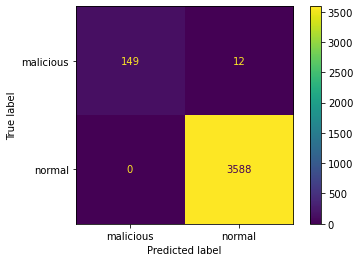

 Accuracy : 0.9967991464390504 
 Precision : 1.0 
 Recall : 0.9254658385093167


In [11]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

confusion_matrix(y, predictions)
plot_confusion_matrix(model, X, y)  
plt.show()
accuracy=accuracy_score(y, predictions)
precision=precision_score(y, predictions, average="binary", pos_label="malicious")
recall=recall_score(y, predictions, average="binary", pos_label="malicious")
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))